# t-test

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt #more data visualization
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') # ignore warnings
from scipy.stats import ttest_ind # for the t-test we'll be doing
from subprocess import check_output 
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
#Are the amounts of sugar in cold cereal and hot cereal related?

cereal = pd.read_csv("Data/cereal.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
cereal.shape

(77, 16)

In [5]:
hot_cereal = cereal.loc[cereal['type'] == 'H', :] # define a hot_cereal df
cold_cereal = cereal.loc[cereal['type'] == 'C', :] # definte a cold_cereal df

In [6]:
ttest_ind(cold_cereal['sugars'], hot_cereal['sugars'], equal_var = False)

Ttest_indResult(statistic=4.994846451755555, pvalue=0.01874372013190692)

In [7]:
#Looks like our sugars are not the same! since the pvalue > .01, 
#we know that our null hypothesis (there is no correlation between the amount of sugars in hot cereal 
#and the amount of sugars in cold cereal)

#Check the Calories
ttest_ind(cold_cereal['calories'], hot_cereal['calories'], equal_var = False)

Ttest_indResult(statistic=3.1070612896033047, pvalue=0.002691710812554955)

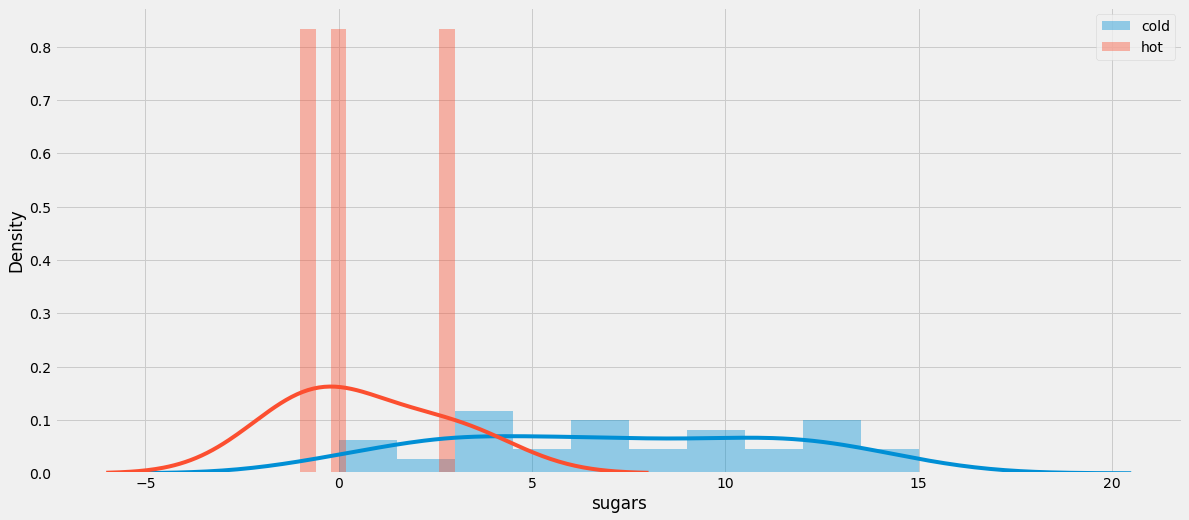

In [7]:
#Let's Visualize
ax = plt.subplots(figsize=(18,8)) # make our plot larger
# plot the cold cereal sugar distribution
sns.distplot(cold_cereal['sugars'], bins = 10, hist = True,  label = 'cold')
# plot the hot cereal sugar distribution
sns.distplot(hot_cereal['sugars'], bins = 10, hist = True, label = 'hot') 
plt.legend() #show legend

In [2]:
my_data = pd.read_csv("Data/hypothesis_testing.csv")
my_data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [3]:
current = my_data['Current']
new = my_data['New']

## Two Sample T-Test

In [4]:
from scipy.stats import ttest_ind

ttest_ind(current, new)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

## Paired T-Test

In [5]:
from scipy import stats

stats.ttest_rel(current, new)

Ttest_relResult(statistic=1.2769699827911767, pvalue=0.20916361823147053)

## Two Sample Z-Test

In [7]:
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(current, x2=new, value=0, alternative='two-sided')
print(float(pval1))
print(float(ztest))

0.18405868087594723
1.3283615935245678
